# Example Conversion Efficiency

This example simulates a single electrolyzer stack with a linear ramping power signal. The electrolyzer is initialized as ON. The full structure for an electrolyzer model is defined in the source code, in `modeling_schema.yaml`.

* Conversion is calculated based on the energy consumed per kg of hydrogen. Units are kWh/kg

* Conversion efficiency is calculated by dividing the low-heating value of hydrogen (33.33 kWh/kg) by the actual conversion.

In [1]:
import numpy as np

from electrolyzer import run_electrolyzer
from electrolyzer.inputs.validation import load_modeling_yaml

import matplotlib.pyplot as plt
%matplotlib inline

## Load Electrolyzer configuration from YAML file

This .yaml file initializes a 1.25MW electrolyzer stack as `ON` with the `BaselineDeg` controller. 

In [2]:
fname_input_modeling = "./modeling_options.yaml"
model_input = load_modeling_yaml(fname_input_modeling)

rated_power = model_input['electrolyzer']['stack']['stack_rating_kW']

# Linear ramping power signal [W]
power_signal_input = np.linspace(1.2e3 * rated_power, 1.2e3 * rated_power, 2000)

elec_sys, results_df = run_electrolyzer(model_input, power_signal_input)

results_df.tail()

results_df.to_csv('results_singlestack_30bar_anode.csv')

### Co-Plot H2 rate and Conversion Efficiency

* Converts DataFrame data to kW and kg/hr
* low-heating value (LHV) = 33.33 kWh/kg
* Rated power = 1250kW 

Minimum Energy Conversion: 79.07 kW/kg


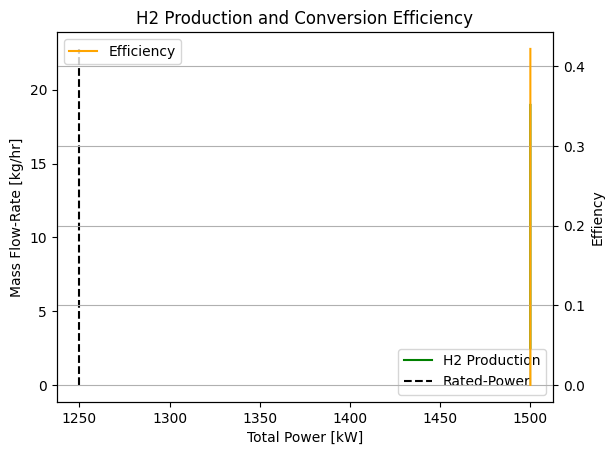

In [3]:
power_kW = results_df['power_signal'] / 1e3
h2rate_kg_hr = results_df['kg_rate'] * 3600 

lhv = 33.33 # kWh/kg

eff_conv = lhv * h2rate_kg_hr / power_kW

eta_kWh_kg = power_kW / h2rate_kg_hr
print(f"Minimum Energy Conversion: {eta_kWh_kg.min():.2f} kW/kg")

fig, ax = plt.subplots()
ax.set_title('H2 Production and Conversion Efficiency')
ax.plot(power_kW, h2rate_kg_hr, label='H2 Production', color='green')
ax.set_xlabel("Total Power [kW]")
ax.set_ylabel("Mass Flow-Rate [kg/hr]")
ax.vlines(x=rated_power, ymin=0, ymax=1.2*h2rate_kg_hr.max(), linestyle='dashed', color='black', label='Rated-Power')
plt.legend(loc='lower right')

ax2 = ax.twinx()
ax2.plot(power_kW, eff_conv, color='orange', label='Efficiency')
ax2.set_ylabel("Effiency")
plt.legend()
plt.grid()